Connected to venv (Python 3.10.0)

 # Analyse Exploratoire du Dataset Chicago Taxi Trips (Version Améliorée)

 Ce notebook vise à explorer le dataset Chicago Taxi Trips en utilisant un échantillon. Nous allons :
 - Charger les données et examiner leur structure initiale.
 - Effectuer des vérifications de qualité des données (cohérence, valeurs suspectes).
 - Analyser en détail les valeurs manquantes.
 - Visualiser la distribution des variables clés (uni- et bi-variées).
 - Créer de nouvelles features (ingénierie de features).
 - Étudier les corrélations entre les variables numériques.
 - Tirer des conclusions pour guider les étapes de prétraitement et modélisation.


 ## 1. Chargement et Informations Initiales

In [1]:
# Import des librairies nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration pour l'affichage des graphiques et le style
%matplotlib inline
sns.set(style="whitegrid")

In [2]:
# Chargement du dataset (échantillon)
# Assurez-vous que le chemin est correct
try:
    df = pd.read_csv('../data/chicago_taxi_sample.csv')
    print("Dataset chargé avec succès.")
except FileNotFoundError:
    print("Erreur : Fichier '../data/chicago_taxi_sample.csv' non trouvé.")
    # Optionnel : arrêter l'exécution ou utiliser un chemin par défaut si nécessaire
    # exit()

# Affichage des premières lignes
print("\nAperçu des données (premières lignes) :")
print(df.head(10))
print(df.describe(include='all'))


/var/folders/yz/8n0rd9yn0hz34drfl1h86v300000gn/T/ipykernel_92661/2852558511.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/chicago_taxi_sample.csv')


Dataset chargé avec succès.

Aperçu des données (premières lignes) :
                                 unique_key  \
0  d2f8e01280a6861a724ad0a2d24db25b3fd245a8   
1  e566f374c3ce214fb9170ba14d0e648752bd81e5   
2  968d05efd75e683d791762eb6e6531d0795eb4a0   
3  f71eaace3a2e9c82c2af7c37079638c038a21904   
4  7f31580e752a69201ca7010b6d717561b8584f36   
5  df5f6baec0a7f1d6f3fb75c109b1d22e31272c44   
6  3914c294ba82824a4930ce63bf70b37e8df660f8   
7  3808e03acbb14c8793ddaf688c1b61b9f87e3530   
8  e497d8c905befa96312b45b7031707d6f296299f   
9  067a7057261b49693199823965c1811f17e96a3c   

                                             taxi_id  \
0  9d13be29c8c770d60d1e3f2d1cade0e2adec9e3d1d0314...   
1  a7cbd93ebf9659f220d75160974932345a5c726ebd4ab4...   
2  9959d6a305434212add615716160196621fe1be826d1d8...   
3  f737a9a31b07650672910268d7cceb9c06a379c0e75070...   
4  c9c466ddddf44ea216b6c885f20d6d1288481639eea512...   
5  9959d6a305434212add615716160196621fe1be826d1d8...   
6  9959d6a305434212ad

In [3]:
# Informations générales sur le DataFrame (types, non-nulls)
print("\nInformations sur le DataFrame :")
df.info()
df.describe()


Informations sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   unique_key              100000 non-null  object 
 1   taxi_id                 100000 non-null  object 
 2   trip_start_timestamp    100000 non-null  object 
 3   trip_end_timestamp      100000 non-null  object 
 4   trip_seconds            99973 non-null   float64
 5   trip_miles              100000 non-null  float64
 6   pickup_census_tract     3890 non-null    float64
 7   dropoff_census_tract    10122 non-null   float64
 8   pickup_community_area   4571 non-null    float64
 9   dropoff_community_area  16009 non-null   float64
 10  fare                    99978 non-null   float64
 11  tips                    99978 non-null   float64
 12  tolls                   99184 non-null   float64
 13  extras                  99978 non-null   f

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,99973.000000,100000.000000,3.890000e+03,1.012200e+04,4571.000000,16009.000000,99978.000000,99978.000000,99184.000000,99978.000000,99978.000000,4579.000000,4579.000000,16038.000000,16038.000000
mean,272.005792,0.233187,1.703143e+10,1.703156e+10,22.561584,30.849147,3.610844,0.242542,0.012154,0.825195,4.692095,41.913635,-87.668611,41.935116,-87.716895
std,2959.436160,0.474791,3.661829e+05,4.017114e+05,21.723816,28.677332,0.588495,2.386912,0.765177,5.692824,6.592946,0.046916,0.071578,0.051767,0.100068
min,0.000000,0.000000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.689730,-87.913625,41.673820,-87.913625
25%,0.000000,0.000000,1.703108e+10,1.703108e+10,8.000000,7.000000,3.250000,0.000000,0.000000,0.000000,3.250000,41.884987,-87.672503,41.892508,-87.756047
50%,60.000000,0.100000,1.703132e+10,1.703182e+10,8.000000,19.000000,3.450000,0.000000,0.000000,0.000000,3.650000,41.899156,-87.642649,41.949974,-87.675086
75%,180.000000,0.400000,1.703183e+10,1.703198e+10,32.000000,59.000000,4.050000,0.000000,0.000000,0.000000,4.450000,41.946501,-87.629105,41.979071,-87.642808
max,86160.000000,72.000000,1.703198e+10,1.703198e+10,77.000000,77.000000,4.450000,172.000000,100.000000,310.000000,313.250000,42.016046,-87.551428,42.016046,-87.551428


In [4]:
# Statistiques descriptives pour les colonnes numériques
print("\nStatistiques descriptives :")
# Note : Les statistiques pour 'fare', 'tips', 'tolls', 'extras', 'trip_total' semblent très basses
# dans le describe() initial fourni. Vérifier si cela est spécifique à l'échantillon.
print(df.describe(include='all'))


Statistiques descriptives :
                                      unique_key  \
count                                     100000   
unique                                    100000   
top     a3aa23ed05e66387df3d1819c03d50c03ccb1822   
freq                                           1   
mean                                         NaN   
std                                          NaN   
min                                          NaN   
25%                                          NaN   
50%                                          NaN   
75%                                          NaN   
max                                          NaN   

                                                  taxi_id  \
count                                              100000   
unique                                               2006   
top     e14b72f6ec0a3804a1a989e2e818a2b82e73ef8b3d462c...   
freq                                                 2147   
mean                                     

In [5]:
print("Liste des colonnes du DataFrame :")
print(df.columns)

Liste des colonnes du DataFrame :
Index(['unique_key', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp',
       'trip_seconds', 'trip_miles', 'pickup_census_tract',
       'dropoff_census_tract', 'pickup_community_area',
       'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras',
       'trip_total', 'payment_type', 'company', 'pickup_latitude',
       'pickup_longitude', 'pickup_location', 'dropoff_latitude',
       'dropoff_longitude', 'dropoff_location'],
      dtype='object')


 ## 2. Nettoyage Initial et Vérification de la Qualité des Données

In [6]:
# Nettoyer les noms de colonnes en retirant les espaces superflus en début et fin
df.columns = df.columns.str.strip()
print("Noms des colonnes après nettoyage :")
print(df.columns)


Noms des colonnes après nettoyage :
Index(['unique_key', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp',
       'trip_seconds', 'trip_miles', 'pickup_census_tract',
       'dropoff_census_tract', 'pickup_community_area',
       'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras',
       'trip_total', 'payment_type', 'company', 'pickup_latitude',
       'pickup_longitude', 'pickup_location', 'dropoff_latitude',
       'dropoff_longitude', 'dropoff_location'],
      dtype='object')


In [7]:
# Conversion des colonnes de timestamp en format datetime
# Gérer les erreurs si certaines valeurs ne sont pas convertibles
try:
    df['trip_start_timestamp'] = pd.to_datetime(df['trip_start_timestamp'])
    df['trip_end_timestamp'] = pd.to_datetime(df['trip_end_timestamp'], errors='coerce') # Coerce met NaT si erreur
    print("\nConversion des timestamps en datetime effectuée.")
except Exception as e:
    print(f"\nErreur lors de la conversion des timestamps : {e}")

# Afficher les types après conversion
df[['trip_start_timestamp', 'trip_end_timestamp']].info()


Conversion des timestamps en datetime effectuée.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   trip_start_timestamp  100000 non-null  datetime64[ns, UTC]
 1   trip_end_timestamp    100000 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2)
memory usage: 1.5 MB


 ### 2.1 Vérification des Valeurs Aberrantes et Suspectes

In [8]:
# Conversion des colonnes numériques en forçant leur type numérique
cols_numeric = ['trip_seconds', 'trip_miles', 'fare']
for col in cols_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Informations sur les colonnes numériques après conversion :")
print(df[cols_numeric].info())


Informations sur les colonnes numériques après conversion :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   trip_seconds  99973 non-null   float64
 1   trip_miles    100000 non-null  float64
 2   fare          99978 non-null   float64
dtypes: float64(3)
memory usage: 2.3 MB
None


In [9]:
# Examiner les courses avec durée <= 0 seconde(s)
print("\nCourses avec durée <= 0 seconde(s):")
zero_duration = df[df['trip_seconds'] <= 0][['unique_key', 'trip_seconds', 'trip_miles', 'fare']]
print(zero_duration.head())
print(f"\nNombre de courses avec durée <= 0 : {len(zero_duration)}")

# Examiner les courses avec distance <= 0 mile(s)
print("\nCourses avec distance <= 0 mile(s):")
zero_distance = df[df['trip_miles'] <= 0][['unique_key', 'trip_seconds', 'trip_miles', 'fare']]
print(zero_distance.head())
print(f"\nNombre de courses avec distance <= 0 : {len(zero_distance)}")



Courses avec durée <= 0 seconde(s):
                                  unique_key  trip_seconds  trip_miles  fare
0   d2f8e01280a6861a724ad0a2d24db25b3fd245a8           0.0         0.0   NaN
8   e497d8c905befa96312b45b7031707d6f296299f           0.0         0.2   NaN
10  98853a8076b9992aed696e028619d2a5e1958bbe           0.0         0.2   NaN
12  dc38b59260d9d6a5d778cb75035abbea5b30a926           0.0        11.5   NaN
20  40da94850ffd5026ffb08bbacc7218bfb6e33ec3           0.0         0.1   NaN

Nombre de courses avec durée <= 0 : 41823

Courses avec distance <= 0 mile(s):
                                  unique_key  trip_seconds  trip_miles  fare
0   d2f8e01280a6861a724ad0a2d24db25b3fd245a8           0.0         0.0   NaN
2   968d05efd75e683d791762eb6e6531d0795eb4a0          60.0         0.0   NaN
5   df5f6baec0a7f1d6f3fb75c109b1d22e31272c44          60.0         0.0   NaN
11  b5ea0c49bdfaa4752a20af4e77ba26a21915e846          60.0         0.0   NaN
17  e617f796f2f501c220e0b31ebb6a4f85

In [10]:
# Examiner les courses avec durée ou distance nulle ou négative
print("\nCourses avec durée <= 0 seconde(s):")
print(df[df['trip_seconds'] <= 0][['unique_key', 'trip_seconds', 'trip_miles', 'fare']].head())

print(f"\nNombre de courses avec durée <= 0 : {len(df[df['trip_seconds'] <= 0])}")

print("\nCourses avec distance <= 0 mile(s):")
print(df[df['trip_miles'] <= 0][['unique_key', 'trip_seconds', 'trip_miles', 'fare']].head())
print(f"\nNombre de courses avec distance <= 0 : {len(df[df['trip_miles'] <= 0])}")


Courses avec durée <= 0 seconde(s):
                                  unique_key  trip_seconds  trip_miles  fare
0   d2f8e01280a6861a724ad0a2d24db25b3fd245a8           0.0         0.0   NaN
8   e497d8c905befa96312b45b7031707d6f296299f           0.0         0.2   NaN
10  98853a8076b9992aed696e028619d2a5e1958bbe           0.0         0.2   NaN
12  dc38b59260d9d6a5d778cb75035abbea5b30a926           0.0        11.5   NaN
20  40da94850ffd5026ffb08bbacc7218bfb6e33ec3           0.0         0.1   NaN

Nombre de courses avec durée <= 0 : 41823

Courses avec distance <= 0 mile(s):
                                  unique_key  trip_seconds  trip_miles  fare
0   d2f8e01280a6861a724ad0a2d24db25b3fd245a8           0.0         0.0   NaN
2   968d05efd75e683d791762eb6e6531d0795eb4a0          60.0         0.0   NaN
5   df5f6baec0a7f1d6f3fb75c109b1d22e31272c44          60.0         0.0   NaN
11  b5ea0c49bdfaa4752a20af4e77ba26a21915e846          60.0         0.0   NaN
17  e617f796f2f501c220e0b31ebb6a4f85

In [11]:
# Examiner les courses extrêmement longues (durée et distance)
# Seuil arbitraire, à ajuster si nécessaire
print("\nCourses très longues (ex: > 3 heures):")
print(df[df['trip_seconds'] > 3 * 3600][['unique_key', 'trip_seconds', 'trip_miles', 'fare']].head())
print(f"\nNombre de courses > 3 heures : {len(df[df['trip_seconds'] > 3 * 3600])}")


print("\nCourses très longues en distance (ex: > 50 miles):")
print(df[df['trip_miles'] > 50][['unique_key', 'trip_seconds', 'trip_miles', 'fare']].head())
print(f"\nNombre de courses > 50 miles : {len(df[df['trip_miles'] > 50])}")


Courses très longues (ex: > 3 heures):
                                  unique_key  trip_seconds  trip_miles  fare
22  015619d01b180d74f1f925f1af3cc08ed933a4a2       35100.0         0.0   0.0
23  fedffcf48d0f68483a3b68d49e2b7a46226d54ac       53400.0         0.0   0.0
24  2409ef06a33d0cd20dc674de602e226a0e383cad       16380.0         0.0   0.0
25  f76153dc8d6a267d5a1b2456889e6d083800a2a4       48480.0         0.0   0.0
26  05f7a06182192499ff55b7cd30ea2c831b6fa775       47760.0         0.0   0.0

Nombre de courses > 3 heures : 449

Courses très longues en distance (ex: > 50 miles):
                                   unique_key  trip_seconds  trip_miles  fare
1    e566f374c3ce214fb9170ba14d0e648752bd81e5        7680.0        57.1   NaN
522  c3f2c11046862ca8ad949d87198ab72d0abb5ec6         780.0        72.0  0.06

Nombre de courses > 50 miles : 2


 ### 2.2 Vérification de la Cohérence des Données

In [12]:
# Conversion des colonnes de composantes en valeurs numériques
cols = ['fare', 'tips', 'tolls', 'extras', 'trip_total']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Calcul de la somme calculée et de la différence
df['calculated_total'] = df['fare'].fillna(0) + df['tips'].fillna(0) + df['tolls'].fillna(0) + df['extras'].fillna(0)
df['total_difference'] = df['trip_total'].fillna(0) - df['calculated_total']

print("\nDescription de la différence entre trip_total et la somme calculée (fare+tips+tolls+extras):")
print(df['total_difference'].describe())

# Affichage des lignes avec une différence significative (> $0.01)
significant_diff_total = df[abs(df['total_difference']) > 0.01]
print(f"\nNombre de lignes avec différence de total significative (> $0.01) : {len(significant_diff_total)}")
if not significant_diff_total.empty:
    print("Exemples de lignes avec différence de total notable:")
    print(significant_diff_total[['fare', 'tips', 'tolls', 'extras', 'trip_total', 'calculated_total', 'total_difference']].head())


Description de la différence entre trip_total et la somme calculée (fare+tips+tolls+extras):
count    100000.000000
mean          0.001456
std           0.236366
min          -0.200000
25%           0.000000
50%           0.000000
75%           0.000000
max          65.110000
Name: total_difference, dtype: float64

Nombre de lignes avec différence de total significative (> $0.01) : 38
Exemples de lignes avec différence de total notable:
     fare  tips  tolls  extras  trip_total  calculated_total  total_difference
928   2.0   0.0    0.0     0.0         2.8               2.0               0.8
929   2.0   0.0    0.0     0.0         2.8               2.0               0.8
930   2.0   0.0    0.0     0.0         2.8               2.0               0.8
931   2.0   0.0    0.0     0.0         2.8               2.0               0.8
932   2.0   0.0    0.0     0.0         2.8               2.0               0.8


In [13]:
# Vérifier la cohérence entre la durée en secondes et les timestamps
# S'assurer que les timestamps ont été convertis et que trip_end_timestamp n'est pas NaT
df_valid_timestamps = df.dropna(subset=['trip_start_timestamp', 'trip_end_timestamp'])
df['duration_calculated'] = (df_valid_timestamps['trip_end_timestamp'] - df_valid_timestamps['trip_start_timestamp']).dt.total_seconds()

# Comparer avec trip_seconds (gérer les NaNs)
# S'assurer que les index correspondent bien lors de la soustraction si df_valid_timestamps a été créé
df['duration_difference'] = df['trip_seconds'].sub(df['duration_calculated'], fill_value=0) # Utiliser .sub pour gérer les index potentiellement différents si on a filtré

print("\nDescription de la différence entre trip_seconds et la durée calculée (via timestamps):")
# Ignorer les NaN pour le describe. On s'attend à une différence proche de 0
print(df['duration_difference'].dropna().describe())

# Afficher les lignes avec une différence significative (ex: > 60 secondes en valeur absolue)
significant_diff_duration = df[abs(df['duration_difference']) > 60]
print(f"\nNombre de lignes avec différence de durée notable (> 60s) : {len(significant_diff_duration)}")
if not significant_diff_duration.empty:
    print("Exemples de lignes avec différence de durée notable:")
    print(significant_diff_duration[['trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds', 'duration_calculated', 'duration_difference']].head())


Description de la différence entre trip_seconds et la durée calculée (via timestamps):
count    100000.000000
mean          0.906350
std         255.514418
min       -4380.000000
25%           0.000000
50%           0.000000
75%         120.000000
max        8100.000000
Name: duration_difference, dtype: float64

Nombre de lignes avec différence de durée notable (> 60s) : 43324
Exemples de lignes avec différence de durée notable:
       trip_start_timestamp        trip_end_timestamp  trip_seconds  \
1 2014-10-03 00:15:00+00:00 2014-10-03 02:15:00+00:00        7680.0   
3 2015-01-16 09:00:00+00:00 2015-01-16 09:15:00+00:00         600.0   
4 2015-03-17 12:15:00+00:00 2015-03-17 12:30:00+00:00         240.0   
7 2015-02-11 19:15:00+00:00 2015-02-11 20:15:00+00:00        3960.0   
9 2015-02-11 23:15:00+00:00 2015-02-11 23:15:00+00:00         300.0   

   duration_calculated  duration_difference  
1               7200.0                480.0  
3                900.0               -300.0  
4

In [14]:
# Vérifier si des courses se terminent avant (ou exactement au même moment) de commencer
invalid_time_order = df[df['trip_end_timestamp'] <= df['trip_start_timestamp']]
print(f"\nNombre de courses terminant avant ou au même moment que le début : {len(invalid_time_order)}")
if not invalid_time_order.empty:
    print("Exemples de lignes avec fin <= début:")
    print(invalid_time_order[['unique_key', 'trip_start_timestamp', 'trip_end_timestamp']].head())


Nombre de courses terminant avant ou au même moment que le début : 90209
Exemples de lignes avec fin <= début:
                                 unique_key      trip_start_timestamp  \
0  d2f8e01280a6861a724ad0a2d24db25b3fd245a8 2014-10-24 12:00:00+00:00   
2  968d05efd75e683d791762eb6e6531d0795eb4a0 2014-12-18 20:00:00+00:00   
5  df5f6baec0a7f1d6f3fb75c109b1d22e31272c44 2015-03-17 20:30:00+00:00   
6  3914c294ba82824a4930ce63bf70b37e8df660f8 2015-01-12 19:15:00+00:00   
8  e497d8c905befa96312b45b7031707d6f296299f 2015-01-21 22:15:00+00:00   

         trip_end_timestamp  
0 2014-10-24 12:00:00+00:00  
2 2014-12-18 20:00:00+00:00  
5 2015-03-17 20:30:00+00:00  
6 2015-01-12 19:15:00+00:00  
8 2015-01-21 22:15:00+00:00  


 ## 3. Analyse des Valeurs Manquantes

 C'est une étape critique vu les résultats de `df.info()`.

In [15]:
# Calcul et tri des pourcentages de valeurs manquantes
missing_pct = df.isnull().sum() / len(df) * 100
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)

print("\nPourcentage de Valeurs Manquantes par Colonne (colonnes avec manquants uniquement):")
print(missing_pct)


Pourcentage de Valeurs Manquantes par Colonne (colonnes avec manquants uniquement):
company                   99.206
pickup_census_tract       96.110
pickup_community_area     95.429
pickup_location           95.421
pickup_latitude           95.421
pickup_longitude          95.421
dropoff_census_tract      89.878
dropoff_community_area    83.991
dropoff_longitude         83.962
dropoff_location          83.962
dropoff_latitude          83.962
tolls                      0.816
trip_seconds               0.027
extras                     0.022
tips                       0.022
fare                       0.022
trip_total                 0.022
dtype: float64


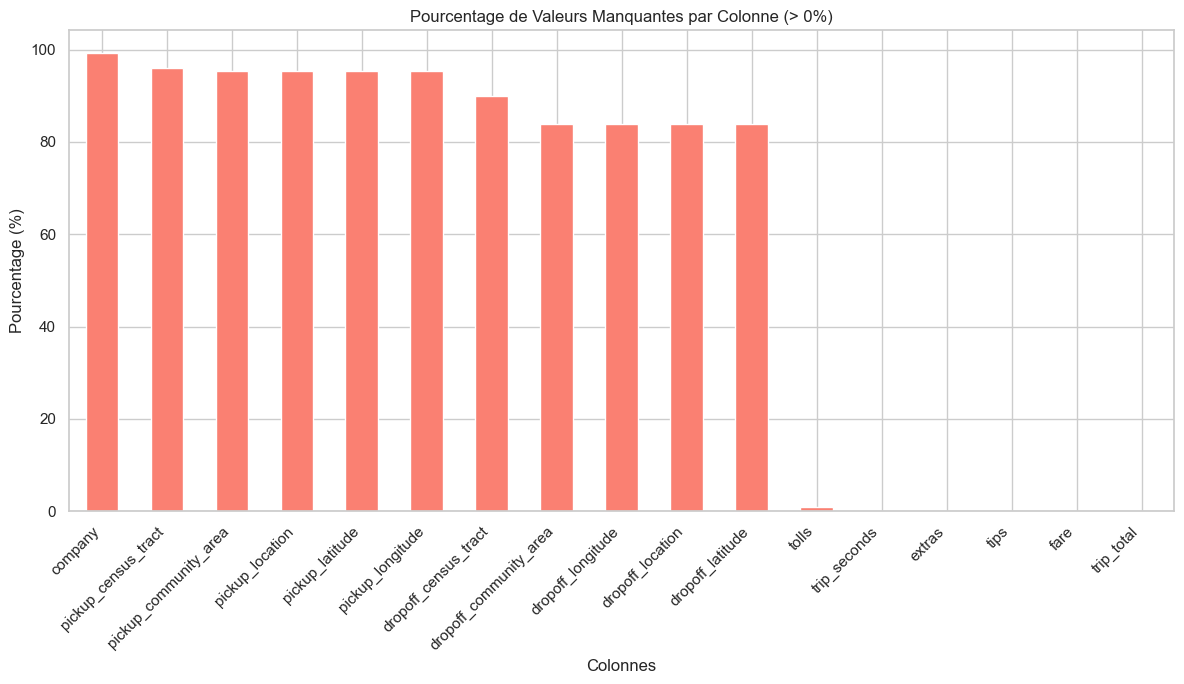

In [16]:
# Visualisation des pourcentages de valeurs manquantes
plt.figure(figsize=(12, 7))
missing_pct.plot(kind='bar', color='salmon')
plt.title("Pourcentage de Valeurs Manquantes par Colonne (> 0%)")
plt.ylabel("Pourcentage (%)")
plt.xlabel("Colonnes")
plt.xticks(rotation=45, ha='right') # Améliorer lisibilité des labels
plt.tight_layout() # Ajuster le layout
plt.show()

 **Constat sur les valeurs manquantes :** Le graphique et les pourcentages montrent un **problème majeur** de données manquantes pour cet échantillon. Plusieurs colonnes liées à la localisation (`pickup/dropoff_census_tract`, `pickup/dropoff_community_area`, `pickup/dropoff_latitude/longitude/location`) et à l'entreprise (`company`) sont manquantes pour une très grande majorité des courses (>80-90%). Cela limitera fortement leur utilisation directe sans stratégies spécifiques (imputation avancée si justifiée, ou plus probablement, suppression pour la modélisation basée sur cet échantillon). Les colonnes `tolls`, `trip_seconds`, `fare`, `tips`, `extras`, `trip_total` ont aussi quelques valeurs manquantes (<20%) qui devront être traitées.

 ## 4. Analyse Univariée

 Exploration de la distribution des variables numériques clés.

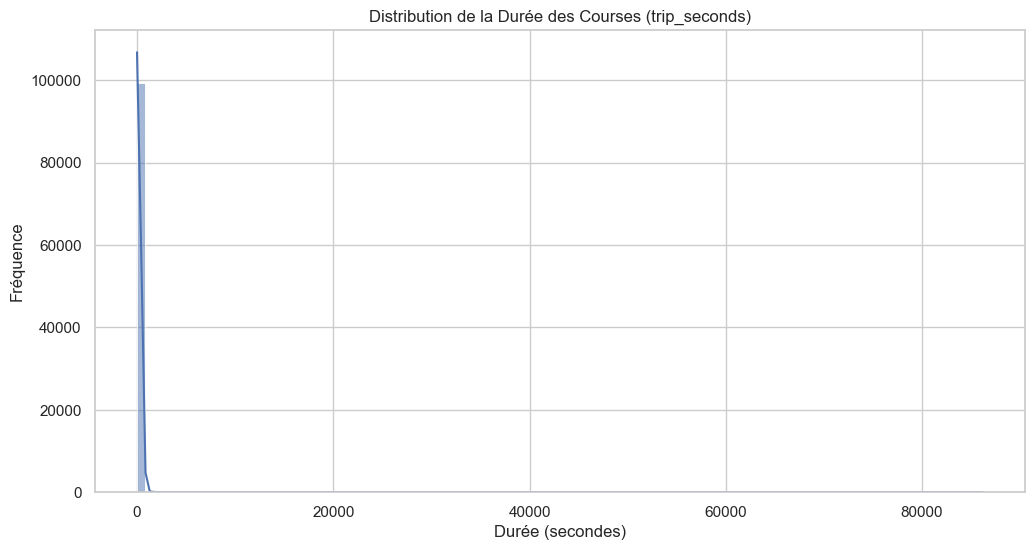

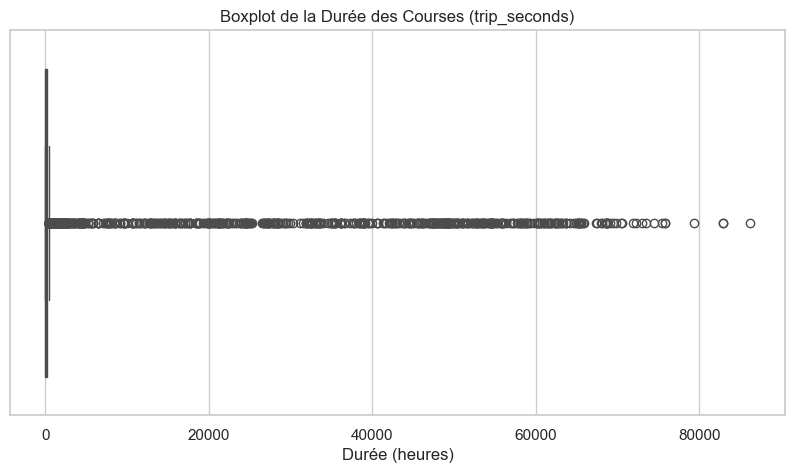

In [17]:
# Distribution de la Durée des Courses (trip_seconds)
plt.figure(figsize=(12, 6))
sns.histplot(df['trip_seconds'].dropna(), bins=100, kde=True) # Augmenter bins pour plus de détails
plt.title("Distribution de la Durée des Courses (trip_seconds)")
plt.xlabel("Durée (secondes)")
plt.ylabel("Fréquence")
# Optionnel : Limiter l'axe x pour mieux voir la masse principale des données
# plt.xlim(0, df['trip_seconds'].quantile(0.99))
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['trip_seconds'].dropna())
plt.title("Boxplot de la Durée des Courses (trip_seconds)")
plt.xlabel("Durée (heures)")
# plt.xlim(0, df['trip_seconds'].quantile(0.99))
plt.show()

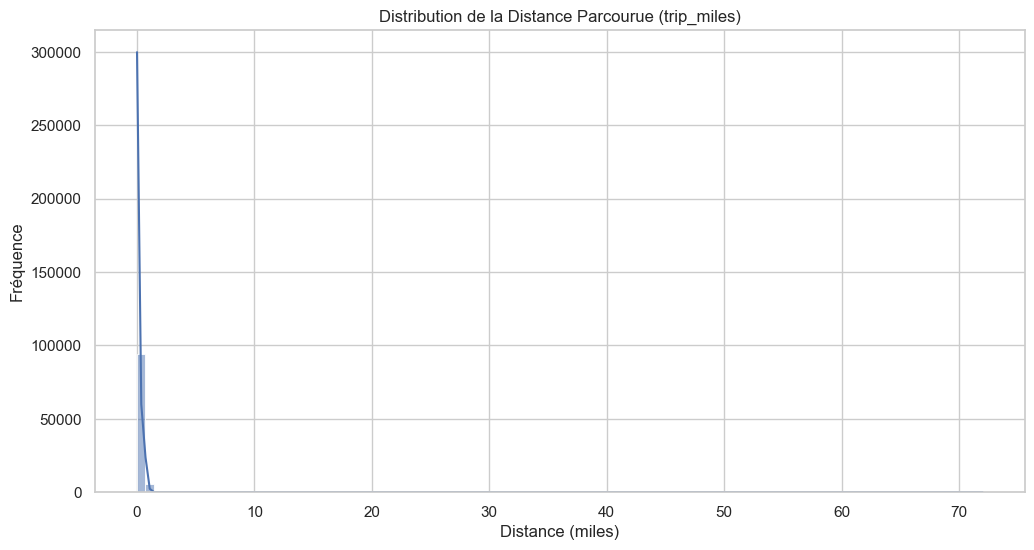

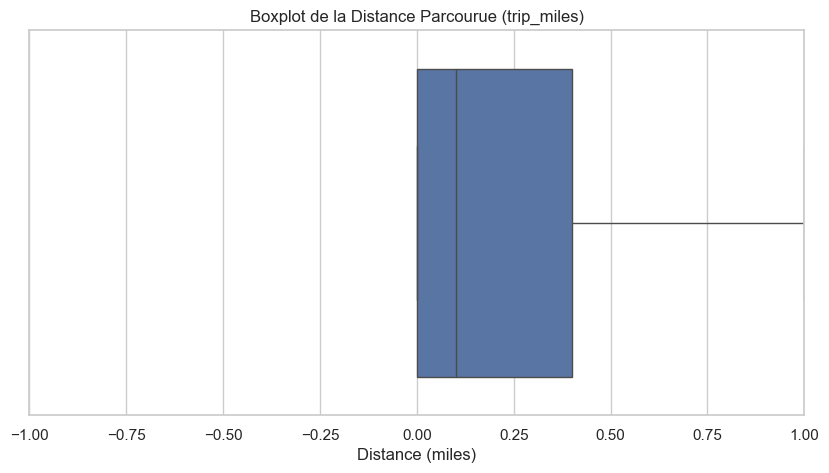

In [18]:
# Distribution de la Distance Parcourue (trip_miles)
plt.figure(figsize=(12, 6))
sns.histplot(df['trip_miles'].dropna(), bins=100, kde=True) # Augmenter bins
plt.title("Distribution de la Distance Parcourue (trip_miles)")
plt.xlabel("Distance (miles)")
plt.ylabel("Fréquence")
# plt.xlim(0, df['trip_miles'].quantile(0.99))
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['trip_miles'].dropna())
plt.title("Boxplot de la Distance Parcourue (trip_miles)")
plt.xlabel("Distance (miles)")
plt.xlim(-1, df['trip_miles'].quantile(0.99)) # Mettre xlim pour mieux voir la boîte malgré les outliers
plt.show()

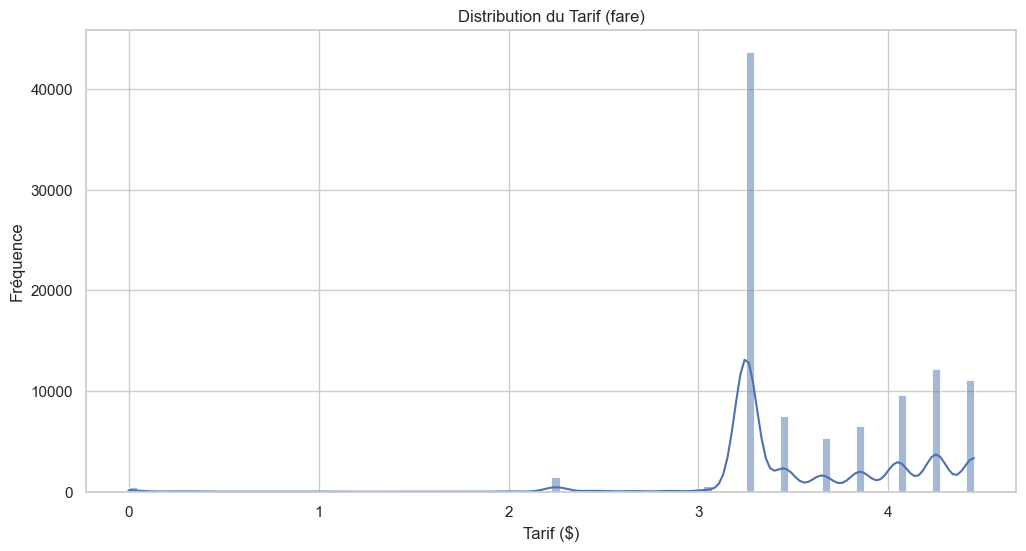

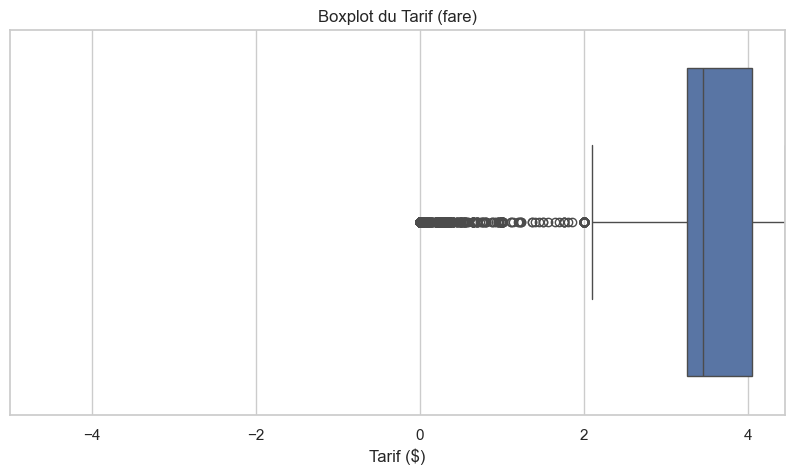

In [19]:
# Distribution du Tarif (fare)
plt.figure(figsize=(12, 6))
sns.histplot(df['fare'].dropna(), bins=100, kde=True) # Augmenter bins
plt.title("Distribution du Tarif (fare)")
plt.xlabel("Tarif ($)")
plt.ylabel("Fréquence")
# plt.xlim(0, df['fare'].quantile(0.99))
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['fare'].dropna())
plt.title("Boxplot du Tarif (fare)")
plt.xlabel("Tarif ($)")
plt.xlim(-5, df['fare'].quantile(0.99) if df['fare'].quantile(0.99) > 0 else 50) # Ajuster xlim
plt.show()

 ### 4.1 Transformation Logarithmique pour Variables Asymétriques
 Pour mieux visualiser la distribution du cœur des données lorsque l'asymétrie est forte.

In [20]:
# Ajouter +1 pour éviter log(0) pour les valeurs nulles (si elles sont considérées valides ou à traiter séparément)
df['log_fare'] = np.log1p(df['fare'].fillna(0)) # Remplacer NaN par 0 avant log
df['log_trip_seconds'] = np.log1p(df['trip_seconds'].fillna(0))
df['log_trip_miles'] = np.log1p(df['trip_miles'].fillna(0))

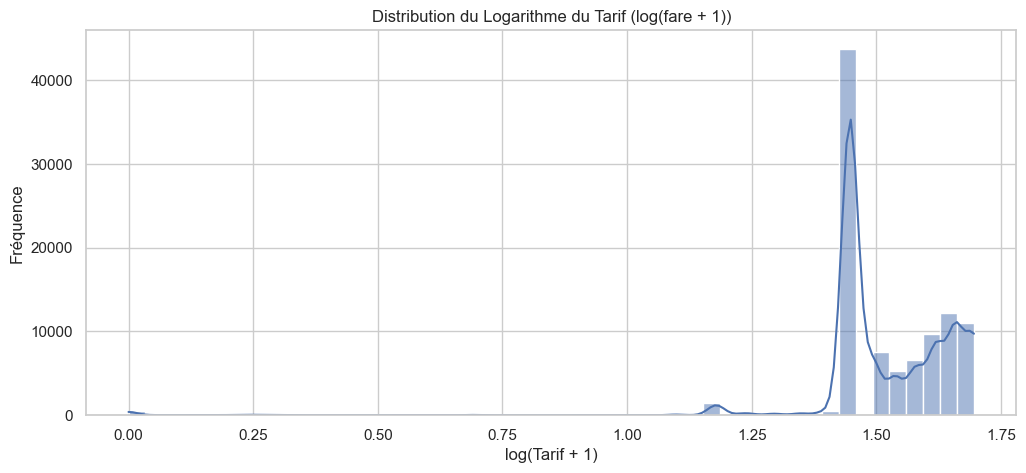

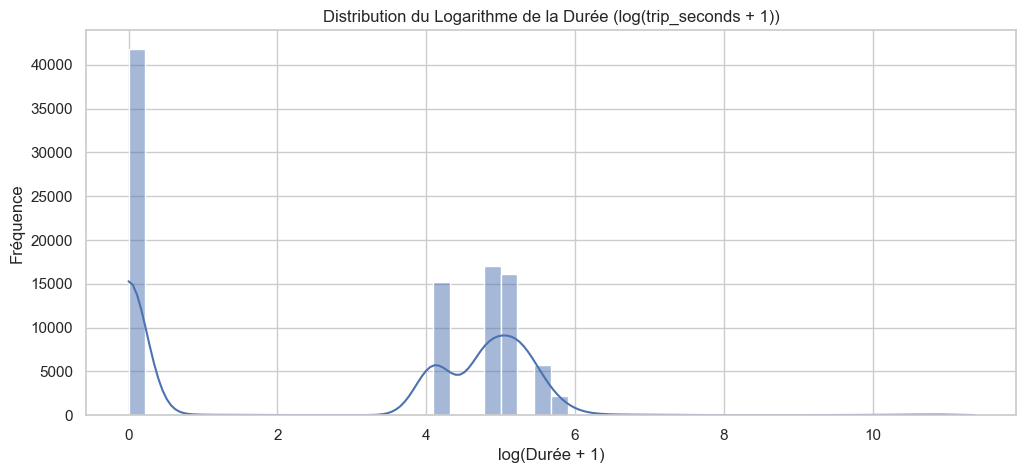

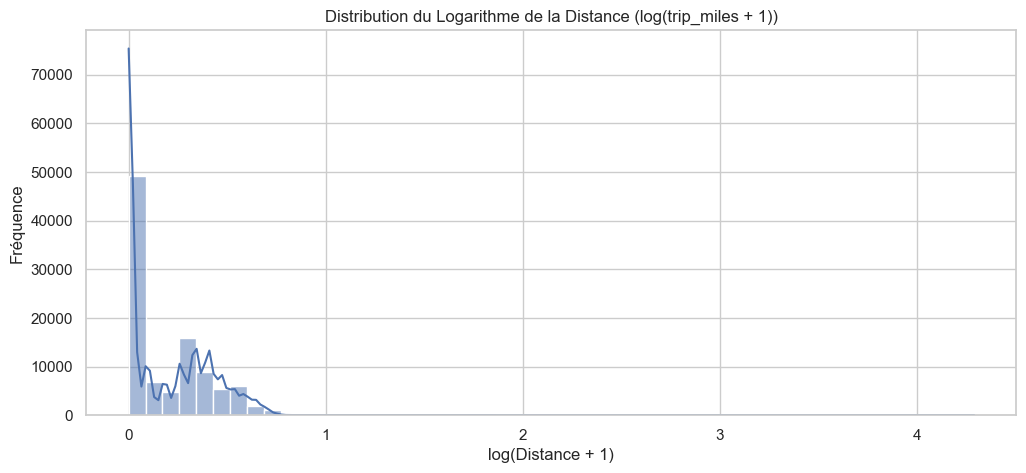

In [21]:
# Distribution Log(Tarif)
plt.figure(figsize=(12, 5))
sns.histplot(df['log_fare'].dropna(), bins=50, kde=True)
plt.title('Distribution du Logarithme du Tarif (log(fare + 1))')
plt.xlabel('log(Tarif + 1)')
plt.ylabel('Fréquence')
plt.show()

# Distribution Log(Durée)
plt.figure(figsize=(12, 5))
sns.histplot(df['log_trip_seconds'].dropna(), bins=50, kde=True)
plt.title('Distribution du Logarithme de la Durée (log(trip_seconds + 1))')
plt.xlabel('log(Durée + 1)')
plt.ylabel('Fréquence')
plt.show()

# Distribution Log(Distance)
plt.figure(figsize=(12, 5))
sns.histplot(df['log_trip_miles'].dropna(), bins=50, kde=True)
plt.title('Distribution du Logarithme de la Distance (log(trip_miles + 1))')
plt.xlabel('log(Distance + 1)')
plt.ylabel('Fréquence')
plt.show()

 **Constat sur les distributions :** Les variables `trip_seconds`, `trip_miles`, et `fare` sont fortement asymétriques à droite (beaucoup de valeurs faibles, quelques valeurs très élevées/outliers). Les transformations logarithmiques aident à visualiser la distribution de la majorité des données, la rendant plus symétrique, ce qui peut être utile pour certains modèles. Les boxplots confirment la présence de nombreux outliers.

 ## 5. Ingénierie de Features (Feature Engineering)
 Création de nouvelles variables à partir des données existantes.

In [22]:
# Features temporelles
df['start_hour'] = df['trip_start_timestamp'].dt.hour
df['day_of_week'] = df['trip_start_timestamp'].dt.dayofweek # Lundi=0, Dimanche=6
df['month'] = df['trip_start_timestamp'].dt.month
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int) # 1 si weekend, 0 sinon

print("\nNouvelles colonnes temporelles créées : 'start_hour', 'day_of_week', 'month', 'is_weekend'")
df[['trip_start_timestamp', 'start_hour', 'day_of_week', 'month', 'is_weekend']].head()


Nouvelles colonnes temporelles créées : 'start_hour', 'day_of_week', 'month', 'is_weekend'


,trip_start_timestamp,start_hour,day_of_week,month,is_weekend
0,2014-10-24 12:00:00+00:00,12,4,10,0
1,2014-10-03 00:15:00+00:00,0,4,10,0
2,2014-12-18 20:00:00+00:00,20,3,12,0
3,2015-01-16 09:00:00+00:00,9,4,1,0
4,2015-03-17 12:15:00+00:00,12,1,3,0


In [23]:
# Feature Vitesse Moyenne
# Remplacer 0 par NaN dans trip_seconds pour éviter la division par zéro, puis calculer
df['trip_seconds_safe'] = df['trip_seconds'].replace(0, np.nan)
# Calculer la vitesse en miles par heure (mph)
df['average_speed_mph'] = df['trip_miles'] / (df['trip_seconds_safe'] / 3600) # Convertir secondes en heures

# Gérer les cas où la vitesse serait infinie (miles > 0 et secondes = 0) ou NaN
df['average_speed_mph'].replace([np.inf, -np.inf], np.nan, inplace=True)

print("\nNouvelle colonne 'average_speed_mph' créée.")
df[['trip_miles', 'trip_seconds', 'average_speed_mph']].head()


Nouvelle colonne 'average_speed_mph' créée.


/var/folders/yz/8n0rd9yn0hz34drfl1h86v300000gn/T/ipykernel_92661/1701109138.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['average_speed_mph'].replace([np.inf, -np.inf], np.nan, inplace=True)


,trip_miles,trip_seconds,average_speed_mph
0,0.0,0.0,NaN
1,57.1,7680.0,26.765625
2,0.0,60.0,0.000000
3,4.0,600.0,24.000000
4,0.9,240.0,13.500000


 ## 6. Analyse Bivariée
 Exploration des relations entre les variables.

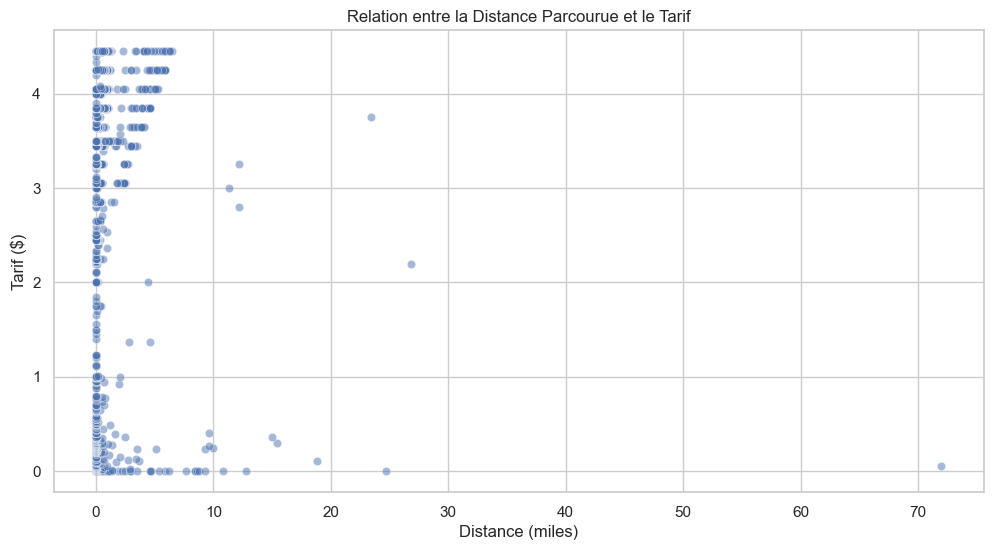

In [24]:
# Relation Distance vs Tarif
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='trip_miles', y='fare', alpha=0.5) # Ajouter alpha pour la transparence
plt.title("Relation entre la Distance Parcourue et le Tarif")
plt.xlabel("Distance (miles)")
plt.ylabel("Tarif ($)")
# Limiter les axes peut aider à voir la relation principale
# plt.xlim(0, df['trip_miles'].quantile(0.98))
# plt.ylim(0, df['fare'].quantile(0.98))
plt.show()

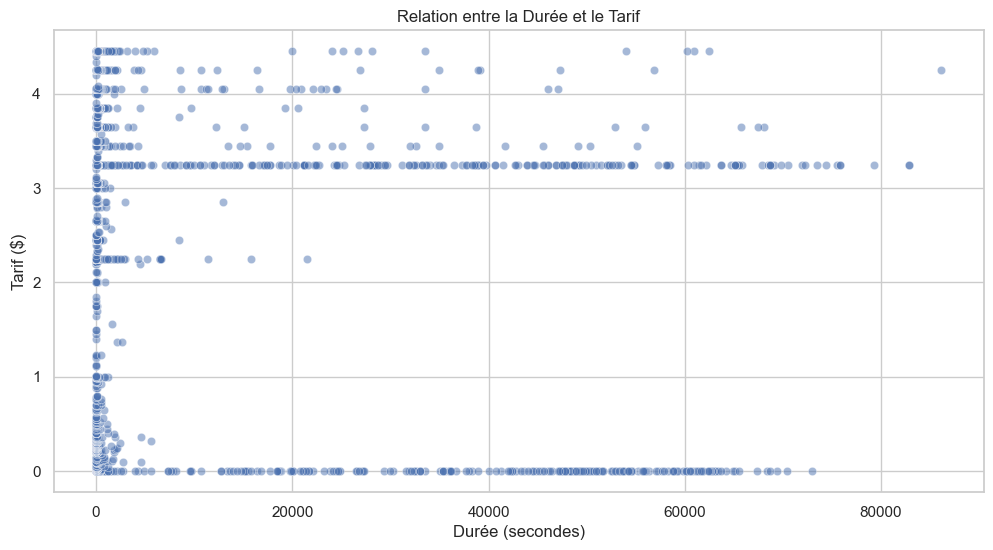

In [25]:
# Relation Durée vs Tarif
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='trip_seconds', y='fare', alpha=0.5)
plt.title("Relation entre la Durée et le Tarif")
plt.xlabel("Durée (secondes)")
plt.ylabel("Tarif ($)")
# plt.xlim(0, df['trip_seconds'].quantile(0.98))
# plt.ylim(0, df['fare'].quantile(0.98))
plt.show()

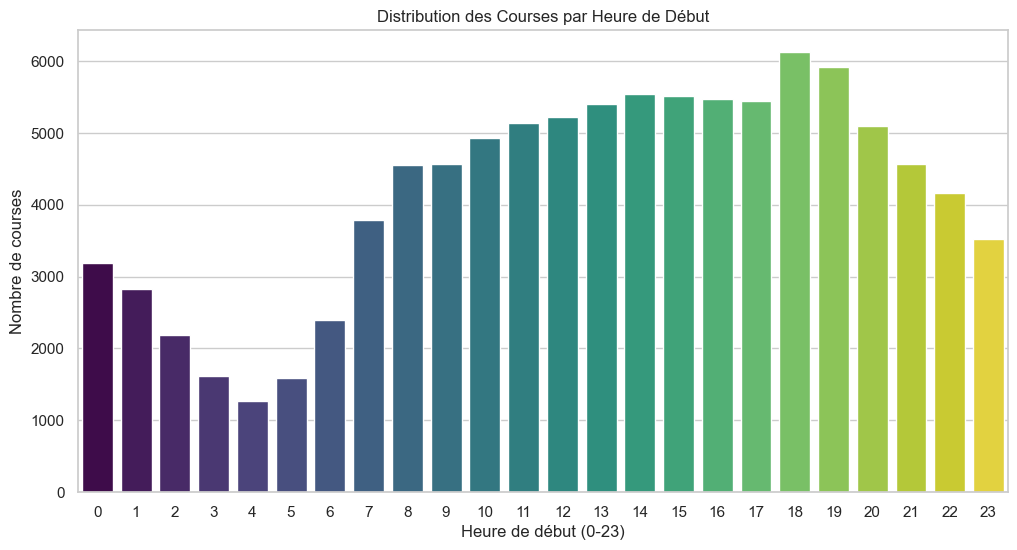

In [26]:
# Distribution des courses par heure de début
plt.figure(figsize=(12, 6))
sns.countplot(x='start_hour', data=df, palette="viridis", hue='start_hour', legend=False) # 'hue' pour la couleur
plt.title("Distribution des Courses par Heure de Début")
plt.xlabel("Heure de début (0-23)")
plt.ylabel("Nombre de courses")
plt.show()

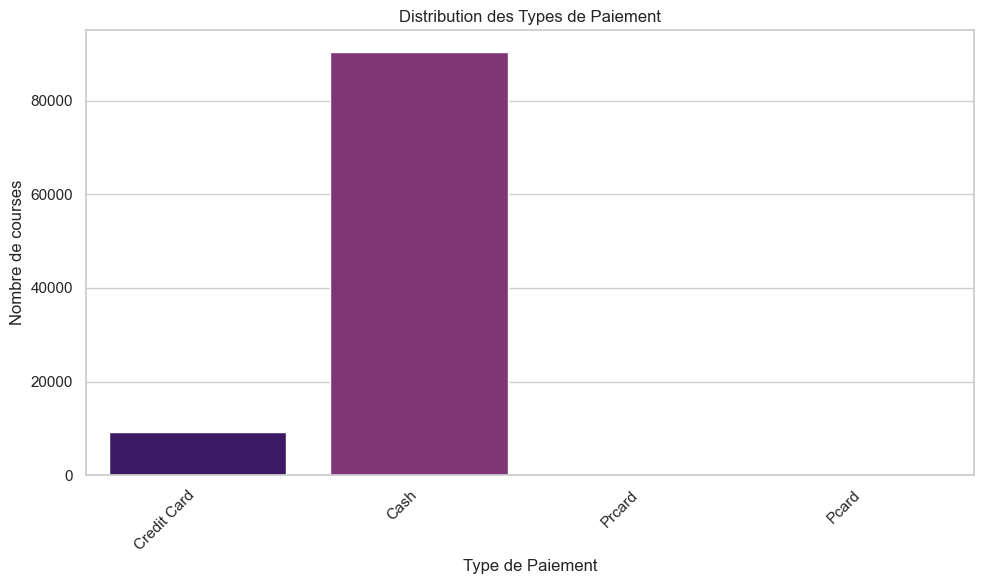

In [27]:
# Distribution des types de paiement
plt.figure(figsize=(10, 6))
sns.countplot(x='payment_type', data=df, palette="magma", hue='payment_type', legend=False)
plt.title("Distribution des Types de Paiement")
plt.xlabel("Type de Paiement")
plt.ylabel("Nombre de courses")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

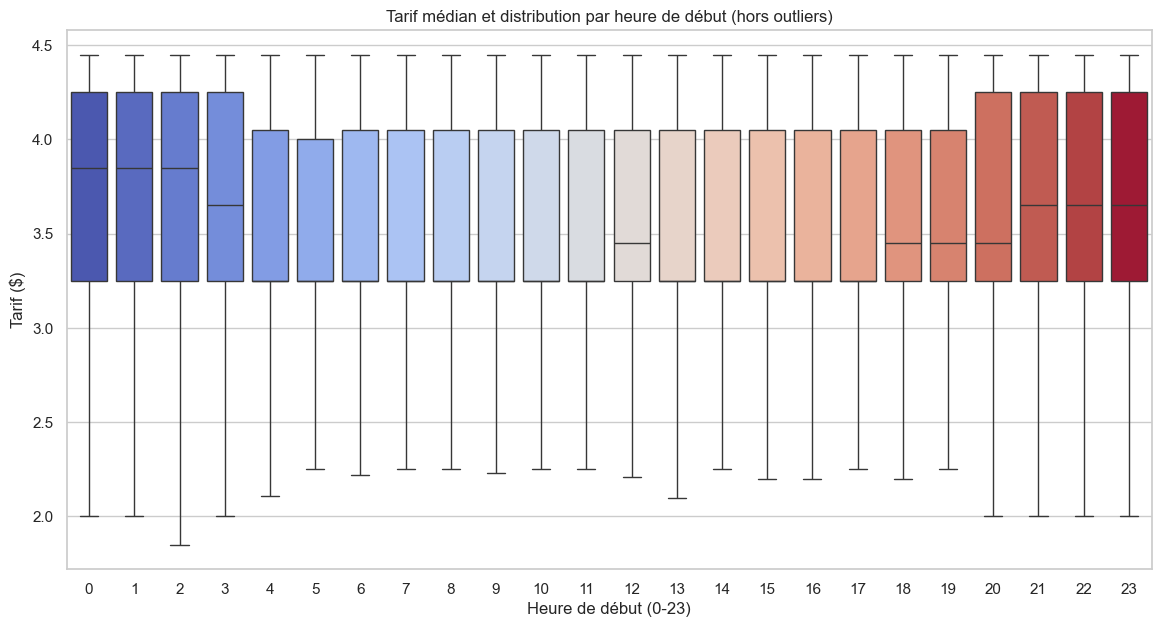

In [28]:
# Tarif moyen par heure de début
plt.figure(figsize=(14, 7))
# Utiliser showfliers=False pour cacher les outliers et mieux voir les tendances des boîtes
sns.boxplot(data=df, x='start_hour', y='fare', showfliers=False, palette="coolwarm", hue='start_hour', legend=False)
plt.title('Tarif médian et distribution par heure de début (hors outliers)')
plt.xlabel('Heure de début (0-23)')
plt.ylabel('Tarif ($)')
plt.show()

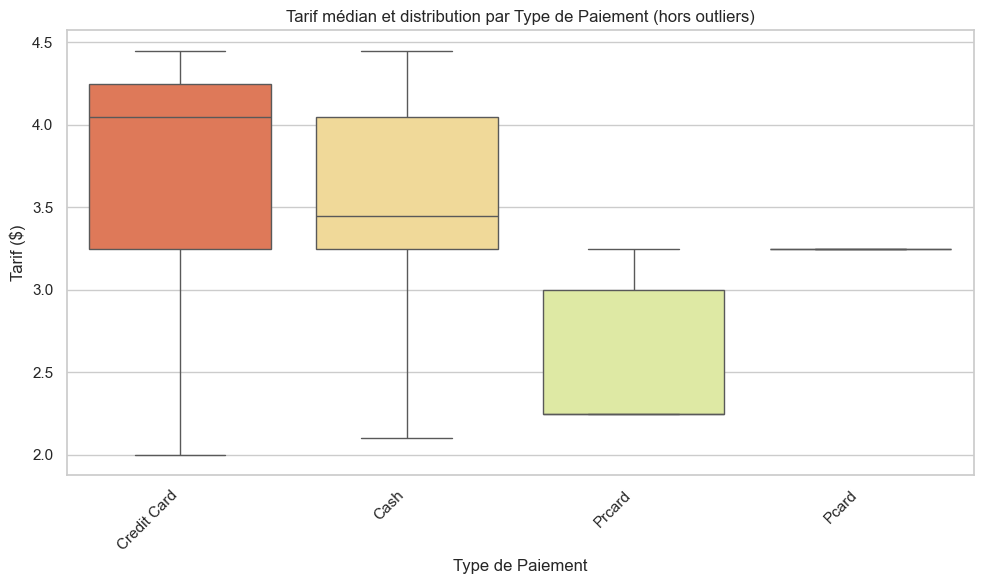

In [29]:
# Tarif moyen par type de paiement
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='payment_type', y='fare', showfliers=False, palette="Spectral", hue='payment_type', legend=False)
plt.title('Tarif médian et distribution par Type de Paiement (hors outliers)')
plt.xlabel('Type de Paiement')
plt.ylabel('Tarif ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

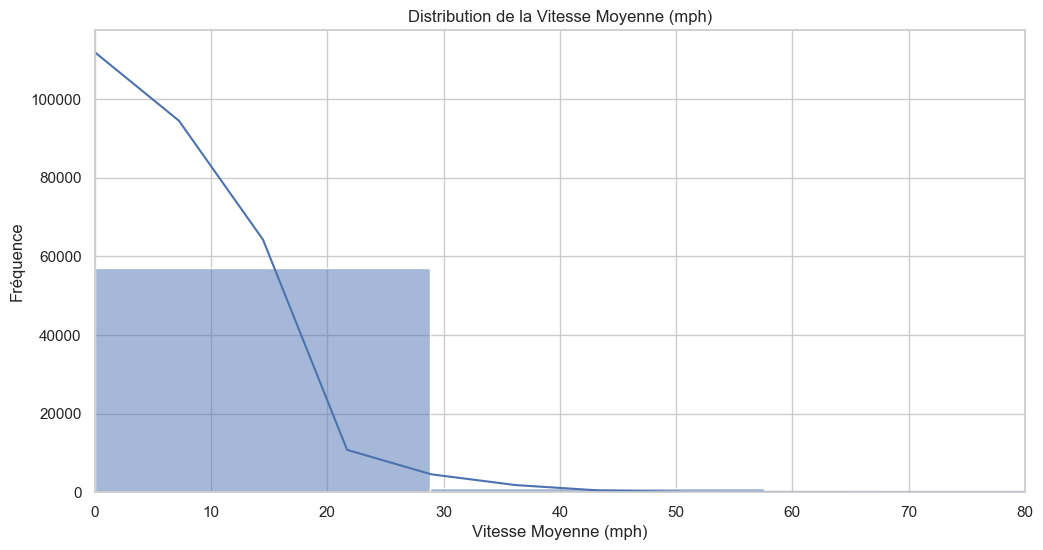

In [30]:
# Distribution de la vitesse moyenne
plt.figure(figsize=(12, 6))
sns.histplot(df['average_speed_mph'].dropna(), bins=50, kde=True)
plt.title("Distribution de la Vitesse Moyenne (mph)")
plt.xlabel("Vitesse Moyenne (mph)")
plt.ylabel("Fréquence")
plt.xlim(0, 80) # Limiter l'axe x pour ignorer les vitesses extrêmes/irréalistes
plt.show()

 ## 7. Analyse de Corrélation

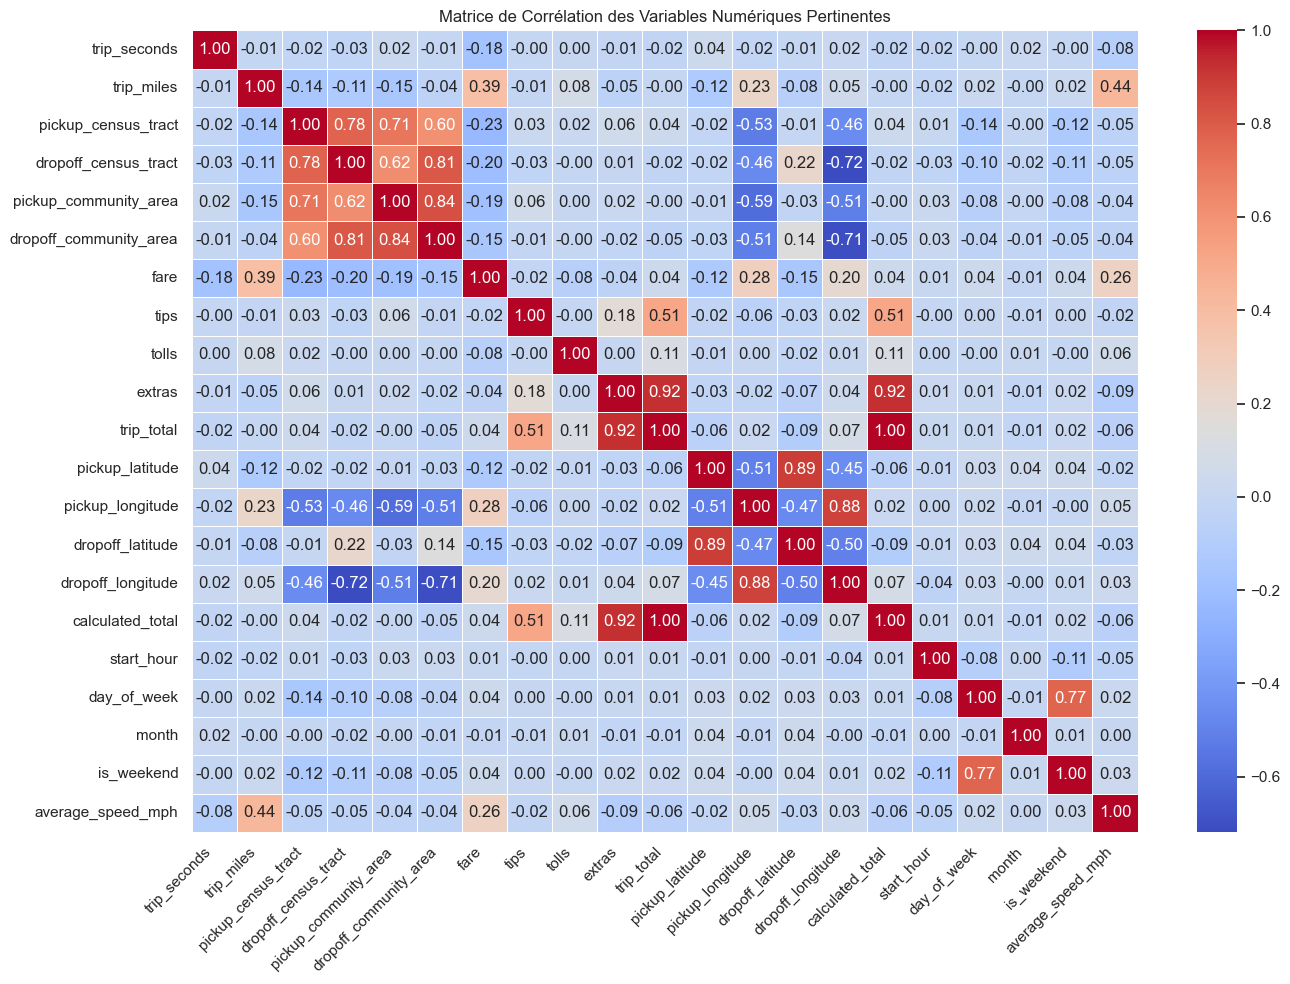

In [31]:
plt.figure(figsize=(14, 10))

# Sélectionner les colonnes numériques pertinentes pour la corrélation
# Inclure les features créées et les variables cibles potentielles
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Optionnel : Exclure certaines colonnes si elles ne sont pas pertinentes pour la corrélation directe
# Par exemple, les colonnes de différence calculées pour le debug, ou les versions log si on garde les originales
cols_to_exclude = ['total_difference', 'duration_difference', 'duration_calculated', 'trip_seconds_safe',
                   'log_fare', 'log_trip_seconds', 'log_trip_miles'] # Exemple d'exclusions
relevant_numeric_cols = [col for col in numeric_cols if col not in cols_to_exclude]

# Calculer la matrice de corrélation sur les colonnes sélectionnées
corr_matrix = df[relevant_numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matrice de Corrélation des Variables Numériques Pertinentes")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

 **Constat sur les corrélations :** Comme attendu, `fare` est positivement corrélé avec `trip_miles` et `trip_seconds`. `trip_total` est fortement corrélé avec `fare` et `tips`. La vitesse moyenne (`average_speed_mph`) montre une corrélation plus faible avec le tarif, ce qui est logique (on ne paie pas directement à la vitesse). Les features temporelles (`start_hour`, `day_of_week`, `month`, `is_weekend`) montrent des corrélations faibles avec le tarif dans cette matrice linéaire, mais les analyses bivariées (boxplots) ont pu montrer des relations non linéaires (ex: tarif variant selon l'heure).

 ## 8. Observations Générales et Synthèse
 - **Qualité des Données (Problèmes Majeurs dans cet Échantillon) :**
     - **Valeurs Manquantes :** Taux extrêmement élevés (>80-90%) pour les colonnes de localisation (`census_tract`, `community_area`, `latitude`, `longitude`) et `company`. Ces colonnes sont difficilement exploitables en l'état avec cet échantillon. D'autres colonnes (`tolls`, `fare`, `tips`, etc.) ont des taux plus faibles mais nécessitent traitement.
     - **Valeurs Aberrantes/Suspectes :** Présence de courses avec `trip_seconds` ou `trip_miles` nuls ou très élevés. Des tarifs (`fare`), pourboires (`tips`), ou totaux (`trip_total`) nuls ou extrêmes existent également.
     - **Incohérences :** Des différences notables existent parfois entre `trip_total` et la somme de ses composantes, et entre `trip_seconds` et la durée calculée via les timestamps. Des courses semblent se terminer avant leur début. Ces points nécessitent un nettoyage plus approfondi ou une clarification sur la signification des données. Les statistiques descriptives initiales pour `fare` semblaient aussi suspectes (très basses).

 - **Distributions et Relations :**
     - Les variables `fare`, `trip_seconds`, `trip_miles` sont très asymétriques à droite. La transformation log aide à normaliser leur distribution.
     - Une relation positive claire existe entre `fare` et `trip_miles`, ainsi qu'entre `fare` et `trip_seconds`.
     - L'heure de début (`start_hour`) influence le nombre de courses (pics aux heures de pointe) et semble influencer le tarif médian ( tarifs potentiellement plus élevés la nuit ou aux heures de pointe).
     - Le type de paiement (`payment_type`) est dominé par certaines catégories (probablement 'Card' et 'Cash' si le dataset complet est similaire), et le tarif médian peut varier légèrement entre les types.

 - **Ingénierie de Features :**
     - Les features temporelles (`start_hour`, `day_of_week`, `is_weekend`) et la vitesse moyenne (`average_speed_mph`) ont été créées et peuvent potentiellement améliorer la modélisation.


 ## 9. Conclusion de l'Analyse Exploratoire et Prochaines Étapes
 L'analyse exploratoire de cet *échantillon* du dataset Chicago Taxi Trips a révélé plusieurs caractéristiques importantes et des **problèmes de qualité significatifs** :

 1.  **Structure Comprise :** Nous avons une meilleure compréhension des variables disponibles et de leur type.
 2.  **Variables Clés Identifiées :** `trip_miles`, `trip_seconds`, ainsi que les features temporelles semblent être les prédicteurs les plus évidents pour le `fare`.
 3.  **Problèmes de Données Mis en Évidence :**
     - Le **taux massif de valeurs manquantes** dans les colonnes de localisation et `company` est le problème le plus critique de cet échantillon, limitant fortement leur utilité.
     - La présence de **valeurs aberrantes et potentiellement erronées** (durées/distances nulles, courses très longues, incohérences de totaux/durées) nécessitera un nettoyage ciblé.
 4.  **Relations Confirmées :** Les corrélations attendues (distance/durée vs tarif) sont confirmées. Des variations de tarif en fonction de l'heure et du type de paiement sont observées.

 **Prochaines Étapes Impératives :**

 - **Stratégie pour les Valeurs Manquantes :** Décider comment gérer les colonnes avec un taux de manquants élevé (probablement suppression si on se limite à cet échantillon). Imputer les valeurs manquantes pour les colonnes avec un faible taux (ex: `fare`, `tips`, `trip_seconds`) en utilisant des méthodes appropriées (moyenne, médiane, etc.).
 - **Traitement des Valeurs Aberrantes/Erronées :** Définir des règles pour filtrer ou corriger les enregistrements incohérents (durées/distances nulles ou extrêmes, incohérences de totaux/durées, fin avant début).
 - **Sélection/Transformation de Features :** Choisir les features les plus pertinentes pour la modélisation. Envisager d'utiliser les versions log-transformées de certaines variables si le modèle choisi en bénéficie. Standardiser/Normaliser les features numériques si nécessaire pour le modèle.
 - **Validation sur Dataset Complet :** Il est crucial de vérifier si ces problèmes (notamment les valeurs manquantes massives) persistent sur l'ensemble du dataset Chicago Taxi Trips, car cet échantillon pourrait ne pas être représentatif. L'analyse et le nettoyage devront être répliqués sur les données complètes avant l'entraînement final du modèle.

 Cette EDA approfondie fournit une base solide pour la phase de prétraitement des données, essentielle pour construire un modèle prédictif performant.
